# Péndulo enhebrado en aro

[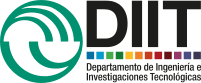](https://ingenieria.unlam.edu.ar/)    
[cc-by-sa](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado
Las partículas de masa $m$ se encuentran unidas por una barra rígida de masa despreciable y longitud $l$.
Una de ellas está enhebrada a un anillo de radio $a$.
El movimiento de la barra se realiza siempre en el plano del anillo.
El sistema se halla bajo el potencial gravitatorio de la superficie terrestre.
Tiene por objetivo determinar la fuerza que debe hacer la barra rígida.

![Péndulo enhebrado](Captura.PNG)

1. Determine un conjunto de coordenadas generalizadas que describan el estado del sistema y una función para el vínculo de interés recordando de no utilizarla para reducir el número de coordenadas.
1. Construya el correspondiente Lagrangiano.
1. Intente obtener de las ecuaciones de Euler-Lagrange la fuerza de vínculo.

## Resolución simbólica en el formalismo Lagrangiano

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

### Variables

In [2]:
# Parámetros físicos del sistema
m, g, l, a = sym.symbols('m, g, l, a', positive=True)

# Coordenadas generalizadas 
t = sym.symbols('t') # tiempo, todo es función del tiempo
theta1 = sym.Function('theta_1')(t)
theta2 = sym.Function('theta_2')(t)
d = sym.Function('d')(t)

# Vínculos 
lambda1= sym.symbols('lambda_1')
f1 = d - l # vínculo l1 como función homogénea

In [3]:
# Sistema cartesiano
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas

# posición en función de coordenadas generalizadas
m1_r = a* (sym.cos(theta1)* N.y + sym.sin(theta1)* N.x)
m2_r = m1_r + d* (sym.cos(theta2)* N.y + sym.sin(theta2)* N.x)

### Energía cinética

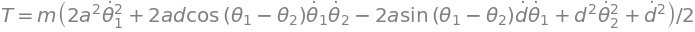

In [4]:
# velocidades
m1_v = m1_r.diff(t,N) # derivada respecto a t en el marco referencial N
m2_v = m2_r.diff(t,N) # derivada respecto a t en el marco referencial N

# energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros
m1_T = unMedio* m* m1_v.dot(m1_v)
m2_T = unMedio* m* m2_v.dot(m2_v)
T = m1_T+ m2_T
cineticaSimbolo = sym.Symbol('T')
sym.Eq(cineticaSimbolo, T.simplify() ) # simplify: simplifica usando factor común y otras operaciones

### Energía potencial

In [5]:
# Energía potencial
m1_V = m* m1_r.dot(-g* N.y) # potencial gravitatorio
m2_V = m* m2_r.dot(-g* N.y) # potencial gravitatorio
V = m1_V + m2_V
potencialSimbolo = sym.Symbol('V')
sym.Eq(potencialSimbolo, V.simplify() )

### Lagrangiano
$$
L(x,\dot{x}) = T(\dot{x})- V(x)
$$

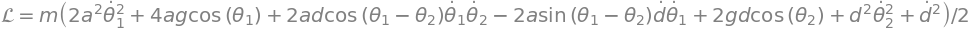

In [6]:
L = T- V
lagrangianoSimbolo = sym.Symbol('\mathcal{L}')
sym.Eq(lagrangianoSimbolo, L.simplify() )

### Ecuaciones de Euler-Lagrange

Primero calculamos el que tiene derivada total respecto al tiempo

$$
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L}
$$

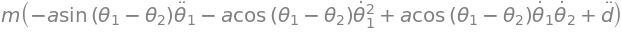

In [7]:
theta1_dtdp = L.diff( theta1.diff(t) ).diff(t)
theta2_dtdp = L.diff( theta2.diff(t) ).diff(t)
d_dtdp = L.diff( d.diff(t) ).diff(t)
d_dtdp.simplify()

Luego el que deriva respecto a la coordenada generalizada

$$
\frac{\partial}{\partial q_i} \mathcal{L}
$$

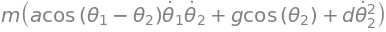

In [8]:
theta1_dq = L.diff( theta1 )
theta2_dq = L.diff( theta2 )
d_dq = L.diff( d )
d_dq.simplify()

Y también hay que obtener los

$$
\sum_j \lambda_j \frac{\partial f_j}{\partial q_i}
$$

In [9]:
theta1_lam = lambda1 * f1.diff( theta1 )
theta2_lam = lambda1 * f1.diff( theta2 )
d_lam = lambda1 * f1.diff( d )
d_lam

Con ambos se escribe la ecuación homegénea (no hay fuerzas no conservativas)

$$
\frac{\partial}{\partial q_i} \mathcal{L}
- \frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q}_i} \mathcal{L}
+ \sum_j \lambda_j \frac{\partial f_j}{\partial q_i}
= 0
$$

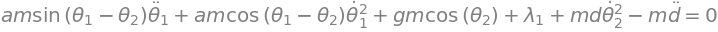

In [10]:
theta1_el = sym.Eq( theta1_dq - theta1_dtdp + theta1_lam, 0) # ecuación igualando a cero
theta2_el = sym.Eq( theta2_dq - theta2_dtdp + theta2_lam, 0) # ecuación igualando a cero
d_el = sym.Eq( d_dq - d_dtdp + d_lam, 0) # ecuación igualando a cero
d_el.simplify()

## Resolución algebráica

Armo un sistema con las ecuaciones que dispongo.

In [11]:
# la función de vínculo es homogénea, basta derivarla dos veces para hacer uso de ella.
sistemaEcuaciones = [
    theta1_el.args[0],
    theta2_el.args[0],
    d_el.args[0],
    f1.diff(t,2)
]
# los sistemas son de funciones homogéneas, no como ecuaciones, por eso .arg[0]

variablesDespeje = [theta1.diff(t,2), theta2.diff(t,2), lambda1]

In [12]:
variablesDespeje_sol= sym.nonlinsolve(sistemaEcuaciones, variablesDespeje ).args[0]

Y se obtiene una lista de despejes cuyos elementos son:
- $\ddot{\theta}_1$ en `variblesDespeje_sol[0]`
- $\ddot{\theta}_2$ en `variblesDespeje_sol[1]`
- $\lambda_1$  en `variblesDespeje_sol[2]`

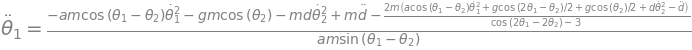

In [13]:
sym.Eq(theta1.diff(t,2), variablesDespeje_sol[0])

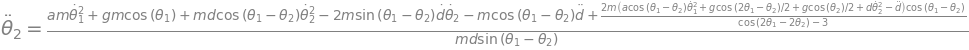

In [14]:
sym.Eq(theta2.diff(t,2), variablesDespeje_sol[1])

### Fuerza de vínculo
De la última se despeja $\lambda_1$ para obtener las fuerzas de vínculo $Q_d = \lambda_1 \frac{\partial f_1}{\partial d} = \lambda_1$.

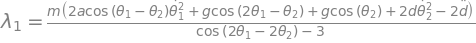

In [15]:
lambda1_sol= variablesDespeje_sol[2].simplify()
sym.Eq(lambda1, lambda1_sol)

A esta última se puede aplicar la condición de vínculo.
Primero despejo $d$.

In [16]:
d_f1 = list( sym.solveset(f1, d) )[0]
sym.Eq(d, d_f1)

Luego se calculan todas las susticiones (aunque en este caso es claro que las derivadas son nulas).

In [17]:
f1_subs = {
    d : d_f1,
    d.diff(t): d_f1.diff(t),
    d.diff(t,2): d_f1.diff(t,2)
}

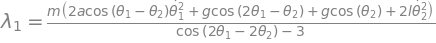

In [18]:
lambda1_funcion = lambda1_sol.subs(f1_subs)
sym.Eq(lambda1, lambda1_funcion)

Como en este caso

$$
Q_d= \lambda_1(t) \frac{\partial}{\partial d} f_1 = \lambda_1(t),
$$
la expresión para la fuerza de vínculo

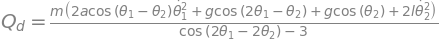

In [19]:
d_Q_simbolo = sym.Symbol('Q_d')
sym.Eq(d_Q_simbolo, lambda1_funcion)

En la expresión figuran $\theta_1$, $\theta_2$, $\dot{\theta}_1$ y $\dot{\theta}_2$.
Para poder estudiar $Q_d = Q_d(t)$ debe resolverse la dinámica del sistema.

## Resolución numérica de la dinámica

De igual manera que se hizo para $\lambda_1$ se subtituyen en las $\ddot{\theta}_i$ las condiciones que dá el vínculo.

In [20]:
theta1_pp_f1subs = variablesDespeje_sol[0].simplify().subs(f1_subs)
theta2_pp_f1subs = variablesDespeje_sol[1].simplify().subs(f1_subs)

Se subtituyen los valores de los parámetros físicos del sistema. 

In [21]:
# escribo los valores numéricos en variables
g_val = 9.81 # [m s-2]
m_val = 1 # [kg]
a_val = 2 # [m]
l_val = 1 # [m]
 
# un diccionario (un tipo de variable Python) fácilará el reemplazar con valores numéricos
parametros = {
    g : g_val,
    m : m_val,
    a : a_val,
    l : l_val
}

In [22]:
theta1_pp_parametros = theta1_pp_f1subs.subs(parametros)
theta2_pp_parametros = theta2_pp_f1subs.subs(parametros)

Y se _lambdifican_ las expresiones.

In [23]:
theta1_pp_numpy = sym.lambdify([theta1, theta1.diff(t), theta2, theta2.diff(t)], theta1_pp_parametros )
theta2_pp_numpy = sym.lambdify([theta1, theta1.diff(t), theta2, theta2.diff(t)], theta2_pp_parametros )

In [24]:
# defino una función con el sistema de derivadas
# t : no se usa en este sistema pero lo dejamos para uso posterior
# y : lista de estado con [y[0], y[1], y[2], y[3]]
# y[0]: theta1
# y[1]: theta1 punto
# y[2]: theta2
# y[3]: theta2 punto
# dydt : lista de derivadas
def derivaday(t, y):
    dydt = [y[1], theta1_pp_numpy(y[0], y[1], y[2], y[3]), y[3], theta2_pp_numpy(y[0], y[1], y[2], y[3]) ]
    return dydt

### Corrida de simulación a partir de parámetros iniciales

Previo a la corrida de la simulación se definen condiciones iniciales del sistema y el rango de tiempo a analizar

In [25]:
# biblioteca de cálculo numérico general
import numpy as np

In [26]:
# rango de tiempo
t_inicial = 0 # [s]
t_final = 20 # [s]
t_paso = 0.01 # [s]
t_rango = np.arange(t_inicial, t_final, t_paso)

# condiciones iniciales
theta1_inicial = np.pi/6.0 # 30 grados
theta2_inicial = np.pi/4.0 # 45 grados
theta1_p_inicial = 0 # parte del reposo
dtheta2_p_inicial = 0 # partel del reposo
y_inicial = [theta1_inicial, theta1_p_inicial, theta2_inicial, dtheta2_p_inicial]

In [27]:
# biblioteca de cálculo científico: eficientes herramientas de cálculo numérico
from scipy.integrate import solve_ivp

In [28]:
# E integrar de a pasos en el tiempo
sol_y = solve_ivp(derivaday, (t_rango[0], t_rango[-1] ), y_inicial, t_eval = t_rango)

## Graficación de la dinámica

In [29]:
# biblioteca de graficación
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [30]:
def graficaFuncion(solucion, nombreCoordenada='q'):
    fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
    fig.suptitle('Integración numérica para $'+ nombreCoordenada + '$', fontsize=16)
    ax[0,0].plot(solucion.t, solucion.y[0]) # posición
    ax[0,0].set(xlabel='t [s]', ylabel= '$' + nombreCoordenada+ '$ [rad]', title='Posición')
    ax[0,1].plot(solucion.t, solucion.y[1]) # velocidad
    ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nombreCoordenada+ '}$ [rad/s]', title='Velocidad')

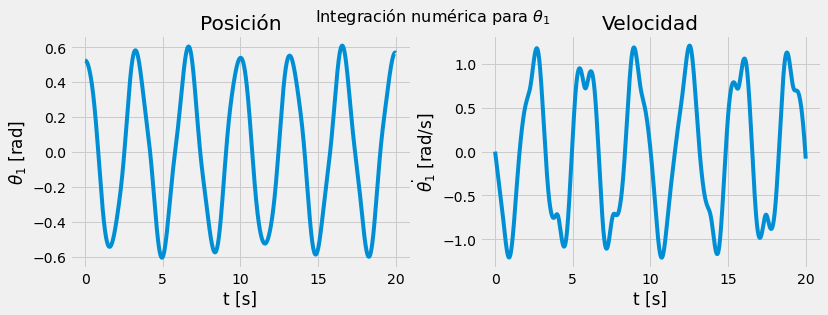

In [31]:
graficaFuncion(sol_y, nombreCoordenada = r'\theta_1')

[Text(0.5, 0, 't [s]'),
 Text(0, 0.5, '$\\dot{\\theta_2}$ [rad/s]'),
 Text(0.5, 1.0, 'Velocidad')]

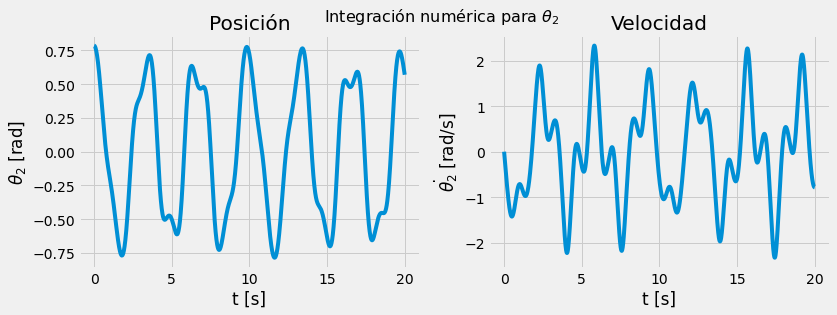

In [32]:
solucion = sol_y
nombreCoordenada = r'\theta_2'

fig, ax = plt.subplots(nrows= 1, ncols= 2, squeeze=False, figsize=(12, 4)) # dos figuras en la misma fila
fig.suptitle('Integración numérica para $'+ nombreCoordenada + '$', fontsize=16)
ax[0,0].plot(solucion.t, solucion.y[2]) # posición
ax[0,0].set(xlabel='t [s]', ylabel= '$' + nombreCoordenada+ '$ [rad]', title='Posición')
ax[0,1].plot(solucion.t, solucion.y[3]) # velocidad
ax[0,1].set(xlabel='t [s]', ylabel='$\dot{' + nombreCoordenada+ '}$ [rad/s]', title='Velocidad')

## Cálculo de la fuerza de vínculo con datos simulación

En la expresión para $Q_d$ se subtituyen los valores de los parámetros físicos del sistema. 

In [33]:
d_Q_parametros = lambda1_funcion.subs(parametros)

Se _lambdifica_ la expresión.

In [34]:
d_Q_numpy = sym.lambdify([theta1, theta1.diff(t), theta2, theta2.diff(t)], d_Q_parametros )

Se usan los resultados de la simulación de la dinámica.

In [35]:
d_Q_simulado = d_Q_numpy(solucion.y[0], solucion.y[1], solucion.y[2], solucion.y[3])

Y se grafica.

[Text(0.5, 0, 't [s]'), Text(0, 0.5, '$Q_d$ [N]')]

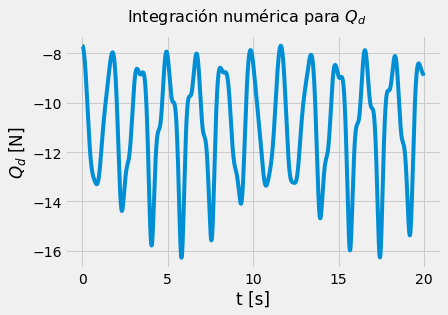

In [36]:
solucion = sol_y
nombreCoordenada = r'Q_d'

fig, ax = plt.subplots(nrows= 1, ncols= 1, squeeze=False, figsize=(6, 4)) # dos figuras en la misma fila
fig.suptitle('Integración numérica para $'+ nombreCoordenada + '$', fontsize=16)
ax[0,0].plot(solucion.t, d_Q_simulado) # posición
ax[0,0].set(xlabel='t [s]', ylabel= '$' + nombreCoordenada+ '$ [N]')